# Crowded Airports Around the World

#### Content
* Rank: Airport ranking for that year
* Airport: Airport name
* Location: Airport location
* Country: Airport country
* Code: Code of the airport (IATA/ICAO)
* Passengers: Total number of passengers
* Year: Year of ranking 

#### Main Questions to be Answered
* Which country has the most crowded airport by year
* Which country has the least crowded airport by year
* What is the total number of passengers of a particular country for a given year (ex: 2020)
* Find anything interesting to you

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

# load the dataset
airports = pd.read_csv('dataset/crowded_airport.csv')
airports.head(20)

,Rank,Airport,Location,Country,Code,Passengers,Year
0,1,China Guangzhou Baiyun International Airport,"Baiyun-Huadu, Guangzhou, Guangdong",China,CAN/ZGGG,43760427,2020
1,2,United States Hartsfield–Jackson Atlanta Inter...,"Atlanta, Georgia",United States,ATL/KATL,42918685,2020
2,3,China Chengdu Shuangliu International Airport,"Shuangliu-Wuhou, Chengdu, Sichuan",China,CTU/ZUUU,40741509,2020
3,4,United States Dallas/Fort Worth International ...,"Dallas-Fort Worth, Texas",United States,DFW/KDFW,39364990,2020
4,5,China Shenzhen Bao'an International Airport,"Bao'an, Shenzhen, Guangdong",China,SZX/ZGSZ,37916059,2020
5,6,China Chongqing Jiangbei International Airport,"Yubei, Chongqing",China,CKG/ZUCK,34937789,2020
6,7,China Beijing Capital International Airport,"Chaoyang-Shunyi, Beijing",China,PEK/ZBAA,34513827,2020
7,8,United States Denver International Airport,"Denver, Colorado",United States,DEN/KDEN,33741129,2020
8,9,China Kunming Changshui International Airport,"Guandu, Kunming, Yunnan",China,KMG/ZPPP,32989127,2020
9,10,China Shanghai Hongqiao International Airport,"Changning-Minhang, Shanghai",China,SHA/ZSSS,31165641,2020


## Cleaning

Before answering the questions above, I'm going to clean the dataframe first in order to ensure that the results presented later on becomes more accurate. <br>
I'll start by looking for null values and making sure that each column already has the correct data type.

In [2]:
# look at the dtypes of each column and check for null values
airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Rank        250 non-null    int64 
 1   Airport     250 non-null    object
 2   Location    250 non-null    object
 3   Country     250 non-null    object
 4   Code        250 non-null    object
 5   Passengers  250 non-null    int64 
 6   Year        250 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 13.8+ KB


from the results above, it looks like there are no null values. <br>
The data type of each column also looks correct.

Next, I'm going to make sure that the countries in the 'Country' column doesn't have any mistakes in spelling.

In [3]:
# Looking at unique values in the 'Country' column
airports['Country'].unique()

array(['China', 'United States', 'Japan', 'India', 'United Arab Emirates',
       'Turkey', 'France', 'United Kingdom', 'Mexico', 'Vietnam',
       'South Korea', 'Netherlands', 'Brazil', 'Russia', 'Germany',
       'Spain', 'Thailand', 'Hong Kong SAR, China', 'Singapore',
       'Malaysia', 'Indonesia', 'Canada', 'Taiwan', 'Philippines',
       'Australia', 'Italy', 'The Netherlands', 'Republic of Korea',
       'Qatar'], dtype=object)

Seems like 'Netherlands' and 'The Netherlands' are the same thing.
After researching in google, it seems like 'South Korea' and 'Republic of Korea' share the same meaning.

Next, I'm going to change 'The Netherlands' to be 'Netherlands' and change 'Republic of Korea' to 'South Korea'.

In [4]:
# Making all country names uniform
airports['Country'] = airports['Country'].str.replace('The Netherlands', 'Netherlands')
airports['Country'] = airports['Country'].str.replace('Republic of Korea', 'South Korea')
airports['Country'] = airports['Country'].str.replace('Hong Kong SAR, China', 'Hong Kong')

In [5]:
countries = airports['Country'].unique()
countries

array(['China', 'United States', 'Japan', 'India', 'United Arab Emirates',
       'Turkey', 'France', 'United Kingdom', 'Mexico', 'Vietnam',
       'South Korea', 'Netherlands', 'Brazil', 'Russia', 'Germany',
       'Spain', 'Thailand', 'Hong Kong', 'Singapore', 'Malaysia',
       'Indonesia', 'Canada', 'Taiwan', 'Philippines', 'Australia',
       'Italy', 'Qatar'], dtype=object)

Looks like all country names are already uniform. <br>

Next, I'm going to separate the country name from the airport name since I don't think it's necessary to have the country name in front of the airport name. There's already a column for countries anyway. <br>
ex: 'China Guangzhou Baiyun International Airport' to 'Guangzhou Baiyun International Airport'

In [6]:
# convert the country column to a list for iteration purposes
countries = airports['Country'].tolist()

# using regex to count the number of words present for each list element
airport_len = []
for country in countries:
    # counting the word count for each value in the list
    x = len(re.findall(r'\w+', country))
    airport_len.append(x)
airports.insert(7, 'country_word_num', airport_len, True)

In [7]:
# make a copy in case I messed up something
airports_v2 = airports.copy()
airports_one_word_country = airports_v2[airports_v2['country_word_num'] == 1]

# this function will get the unique countries from the country column
# I made this function since I'm going to reuse this code for countries that has 2-4 words.
def country_extract(country_len):
    country_len = country_len.tolist()
    country_len_list = list(set(country_len))
    return country_len_list

country_one_word = airports_one_word_country['Country']
country_one_word_list = country_extract(country_one_word)

In [8]:
airports_one_word_country

,Rank,Airport,Location,Country,Code,Passengers,Year,country_word_num
0,1,China Guangzhou Baiyun International Airport,"Baiyun-Huadu, Guangzhou, Guangdong",China,CAN/ZGGG,43760427,2020,1
2,3,China Chengdu Shuangliu International Airport,"Shuangliu-Wuhou, Chengdu, Sichuan",China,CTU/ZUUU,40741509,2020,1
4,5,China Shenzhen Bao'an International Airport,"Bao'an, Shenzhen, Guangdong",China,SZX/ZGSZ,37916059,2020,1
5,6,China Chongqing Jiangbei International Airport,"Yubei, Chongqing",China,CKG/ZUCK,34937789,2020,1
6,7,China Beijing Capital International Airport,"Chaoyang-Shunyi, Beijing",China,PEK/ZBAA,34513827,2020,1
...,...,...,...,...,...,...,...,...
243,44,Mexico Mexico City International Airport,"Venustiano Carranza, Mexico City",Mexico,MEX/MMMX,41410254,2016,1
244,45,China Shanghai Hongqiao International Airport,"Changning-Minhang, Shanghai",China,SHA/ZSSS,40460135,2016,1
246,47,Philippines Ninoy Aquino International Airport,"Pasay/Parañaque, Metro Manila",Philippines,MNL/RPLL,39534991,2016,1
247,48,Japan Narita International Airport,"Narita, Chiba",Japan,NRT/RJAA,39000563,2016,1


In [9]:
# check to see if the filtering is done correctly
airports_one_word_country['Country'].unique()

array(['China', 'Japan', 'India', 'Turkey', 'France', 'Mexico', 'Vietnam',
       'Netherlands', 'Brazil', 'Russia', 'Germany', 'Spain', 'Thailand',
       'Singapore', 'Malaysia', 'Indonesia', 'Canada', 'Taiwan',
       'Philippines', 'Australia', 'Italy', 'Qatar'], dtype=object)

In [10]:
# split the airport column to be able to get the first index (i.e country name)
airport_one_word_country_names = airports_one_word_country['Airport'].str.split().tolist()

# this function will remove the country name from the airport name
def airport_country_remove(airport_column, country_list):
    for name in airport_column:
        if name[0] in country_list:
            name.remove(name[0])
    
    airport_name_list = []
    for name in airport_column:
        x = ' '.join(name)
        airport_name_list.append(x)
    return airport_name_list

airport_name_one_word_country_list = airport_country_remove(airport_one_word_country_names, country_one_word_list)

# look at the first 5 results to see if the country name has been removed
airport_name_one_word_country_list[0:5]

['Guangzhou Baiyun International Airport',
 'Chengdu Shuangliu International Airport',
 "Shenzhen Bao'an International Airport",
 'Chongqing Jiangbei International Airport',
 'Beijing Capital International Airport']

In [11]:
# insert the list to the dataframe to get the new airport name
airports_one_word_country.insert(2, 'Airport Name', airport_name_one_word_country_list, True)

In [12]:
airports_one_word_country

,Rank,Airport,Airport Name,Location,Country,Code,Passengers,Year,country_word_num
0,1,China Guangzhou Baiyun International Airport,Guangzhou Baiyun International Airport,"Baiyun-Huadu, Guangzhou, Guangdong",China,CAN/ZGGG,43760427,2020,1
2,3,China Chengdu Shuangliu International Airport,Chengdu Shuangliu International Airport,"Shuangliu-Wuhou, Chengdu, Sichuan",China,CTU/ZUUU,40741509,2020,1
4,5,China Shenzhen Bao'an International Airport,Shenzhen Bao'an International Airport,"Bao'an, Shenzhen, Guangdong",China,SZX/ZGSZ,37916059,2020,1
5,6,China Chongqing Jiangbei International Airport,Chongqing Jiangbei International Airport,"Yubei, Chongqing",China,CKG/ZUCK,34937789,2020,1
6,7,China Beijing Capital International Airport,Beijing Capital International Airport,"Chaoyang-Shunyi, Beijing",China,PEK/ZBAA,34513827,2020,1
...,...,...,...,...,...,...,...,...,...
243,44,Mexico Mexico City International Airport,Mexico City International Airport,"Venustiano Carranza, Mexico City",Mexico,MEX/MMMX,41410254,2016,1
244,45,China Shanghai Hongqiao International Airport,Shanghai Hongqiao International Airport,"Changning-Minhang, Shanghai",China,SHA/ZSSS,40460135,2016,1
246,47,Philippines Ninoy Aquino International Airport,Ninoy Aquino International Airport,"Pasay/Parañaque, Metro Manila",Philippines,MNL/RPLL,39534991,2016,1
247,48,Japan Narita International Airport,Narita International Airport,"Narita, Chiba",Japan,NRT/RJAA,39000563,2016,1


In [13]:
# do the same thing for countries with 2 words
airport_two_word_country = airports_v2[airports_v2['country_word_num'] == 2]

country_two_word = airport_two_word_country['Country']
country_two_word_list = country_extract(country_two_word)

airport_two_word_country_names = airport_two_word_country['Airport'].str.split().tolist()
airport_two_word_country_names[0:5]

[['United',
  'States',
  'Hartsfield–Jackson',
  'Atlanta',
  'International',
  'Airport'],
 ['United', 'States', 'Dallas/Fort', 'Worth', 'International', 'Airport'],
 ['United', 'States', 'Denver', 'International', 'Airport'],
 ['United', 'States', "O'Hare", 'International', 'Airport'],
 ['United', 'States', 'Los', 'Angeles', 'International', 'Airport']]

In [14]:
country_two_word_list

['United Kingdom', 'Hong Kong', 'United States', 'South Korea']

Looking at the last 2 results, I need to join the first 2 indexes so that it will match with `country_two_word_list` in order to remove the country name. 

ex: ['United', 'States'] -> ['United States']

In [15]:
i = 0
while i < len(airport_two_word_country_names):
    airport_two_word_country_names[i][0:2] = [' '.join(airport_two_word_country_names[i][0:2])]
    i += 1
airport_two_word_country_names_list = airport_country_remove(airport_two_word_country_names, country_two_word_list)
airport_two_word_country_names_list[0:5]

['Hartsfield–Jackson Atlanta International Airport',
 'Dallas/Fort Worth International Airport',
 'Denver International Airport',
 "O'Hare International Airport",
 'Los Angeles International Airport']

In [16]:
# insert to the airport_two_country dataframe
airport_two_word_country.insert(2, 'Airport Name', airport_two_word_country_names_list, True)

In [17]:
airport_two_word_country

,Rank,Airport,Airport Name,Location,Country,Code,Passengers,Year,country_word_num
1,2,United States Hartsfield–Jackson Atlanta Inter...,Hartsfield–Jackson Atlanta International Airport,"Atlanta, Georgia",United States,ATL/KATL,42918685,2020,2
3,4,United States Dallas/Fort Worth International ...,Dallas/Fort Worth International Airport,"Dallas-Fort Worth, Texas",United States,DFW/KDFW,39364990,2020,2
7,8,United States Denver International Airport,Denver International Airport,"Denver, Colorado",United States,DEN/KDEN,33741129,2020,2
12,13,United States O'Hare International Airport,O'Hare International Airport,"Chicago, Illinois",United States,ORD/KORD,30860251,2020,2
14,15,United States Los Angeles International Airport,Los Angeles International Airport,"Los Angeles, California",United States,LAX/KLAX,28779527,2020,2
...,...,...,...,...,...,...,...,...,...
234,35,United Kingdom Gatwick Airport,Gatwick Airport,"Crawley, West Sussex",United Kingdom,LGW/EGKK,43136795,2016,2
240,41,United States Orlando International Airport,Orlando International Airport,"Orlando, Florida",United States,MCO/KMCO,41923399,2016,2
242,43,United States George Bush Intercontinental Air...,George Bush Intercontinental Airport,"Houston, Texas",United States,IAH/KIAH,41622594,2016,2
245,46,United States Newark Liberty International Air...,Newark Liberty International Airport,"Newark, New Jersey",United States,EWR/KEWR,40289969,2016,2


In [18]:
# do the same to countries with 3 words
airport_three_word_country = airports_v2[airports_v2['country_word_num'] == 3]

country_three_word = airport_three_word_country['Country']
country_three_word_list = country_extract(country_three_word)

airport_three_word_country_names = airport_three_word_country['Airport'].str.split().tolist()
airport_three_word_country_names

[['United', 'Arab', 'Emirates', 'Dubai', 'International', 'Airport'],
 ['United', 'Arab', 'Emirates', 'Dubai', 'International', 'Airport'],
 ['United', 'Arab', 'Emirates', 'Dubai', 'International', 'Airport'],
 ['United', 'Arab', 'Emirates', 'Dubai', 'International', 'Airport'],
 ['United', 'Arab', 'Emirates', 'Dubai', 'International', 'Airport']]

In [19]:
country_three_word_list

['United Arab Emirates']

In [20]:
i = 0
while i < len(airport_three_word_country_names):
    airport_three_word_country_names[i][0:3] = [' '.join(airport_three_word_country_names[i][0:3])]
    i += 1
airport_three_word_country_names_list = airport_country_remove(airport_three_word_country_names, country_three_word_list)
airport_three_word_country_names_list[0:5]

['Dubai International Airport',
 'Dubai International Airport',
 'Dubai International Airport',
 'Dubai International Airport',
 'Dubai International Airport']

In [21]:
# insert to the airport_two_country dataframe
airport_three_word_country.insert(2, 'Airport Name', airport_three_word_country_names_list, True)

In [22]:
airport_three_word_country

,Rank,Airport,Airport Name,Location,Country,Code,Passengers,Year,country_word_num
18,19,United Arab Emirates Dubai International Airport,Dubai International Airport,"Garhoud, Dubai",United Arab Emirates,DXB/OMDB,25900000,2020,3
53,4,United Arab Emirates Dubai International Airport,Dubai International Airport,"Garhoud, Dubai",United Arab Emirates,DXB/OMDB,86396757,2019,3
102,3,United Arab Emirates Dubai International Airport,Dubai International Airport,"Garhoud, Dubai",United Arab Emirates,DXB/OMDB,89149387,2018,3
152,3,United Arab Emirates Dubai International Airport,Dubai International Airport,"Garhoud, Dubai",United Arab Emirates,DXB/OMDB,88242099,2017,3
202,3,United Arab Emirates Dubai International Airport,Dubai International Airport,"Garhoud, Dubai",United Arab Emirates,DXB/OMDB,83654250,2016,3


In [23]:
# combining all three dataframe into one dataframe
airports_new = pd.concat([airports_one_word_country, airport_two_word_country, airport_three_word_country])
airports_new = airports_new.sort_index()

In [24]:
airports_new.head(10)

,Rank,Airport,Airport Name,Location,Country,Code,Passengers,Year,country_word_num
0,1,China Guangzhou Baiyun International Airport,Guangzhou Baiyun International Airport,"Baiyun-Huadu, Guangzhou, Guangdong",China,CAN/ZGGG,43760427,2020,1
1,2,United States Hartsfield–Jackson Atlanta Inter...,Hartsfield–Jackson Atlanta International Airport,"Atlanta, Georgia",United States,ATL/KATL,42918685,2020,2
2,3,China Chengdu Shuangliu International Airport,Chengdu Shuangliu International Airport,"Shuangliu-Wuhou, Chengdu, Sichuan",China,CTU/ZUUU,40741509,2020,1
3,4,United States Dallas/Fort Worth International ...,Dallas/Fort Worth International Airport,"Dallas-Fort Worth, Texas",United States,DFW/KDFW,39364990,2020,2
4,5,China Shenzhen Bao'an International Airport,Shenzhen Bao'an International Airport,"Bao'an, Shenzhen, Guangdong",China,SZX/ZGSZ,37916059,2020,1
5,6,China Chongqing Jiangbei International Airport,Chongqing Jiangbei International Airport,"Yubei, Chongqing",China,CKG/ZUCK,34937789,2020,1
6,7,China Beijing Capital International Airport,Beijing Capital International Airport,"Chaoyang-Shunyi, Beijing",China,PEK/ZBAA,34513827,2020,1
7,8,United States Denver International Airport,Denver International Airport,"Denver, Colorado",United States,DEN/KDEN,33741129,2020,2
8,9,China Kunming Changshui International Airport,Kunming Changshui International Airport,"Guandu, Kunming, Yunnan",China,KMG/ZPPP,32989127,2020,1
9,10,China Shanghai Hongqiao International Airport,Shanghai Hongqiao International Airport,"Changning-Minhang, Shanghai",China,SHA/ZSSS,31165641,2020,1


Next, I'm going to make a new `Location` column by extracting the words in the last position of each row so that it would be more convenient for grouping later on.

In [25]:
airports_new['Airport Location'] = airports_new['Location'].str.split(',').str[-1]
airports_new.insert(3, 'Airport Location', airports_new.pop('Airport Location'))

The dataset looks clean enough for now and can already be used for analysis. <br>
For the final touch, I'm going to drop the `Airport` column and `country_word_num` column.

In [26]:
airports_final = airports_new.copy()
airports_final = airports_final.drop(['Airport', 'country_word_num'], axis=1)
airports_final.rename(columns={'Location':'Specific Location'}, inplace=True)
airports_final.head(10)

,Rank,Airport Name,Airport Location,Specific Location,Country,Code,Passengers,Year
0,1,Guangzhou Baiyun International Airport,Guangdong,"Baiyun-Huadu, Guangzhou, Guangdong",China,CAN/ZGGG,43760427,2020
1,2,Hartsfield–Jackson Atlanta International Airport,Georgia,"Atlanta, Georgia",United States,ATL/KATL,42918685,2020
2,3,Chengdu Shuangliu International Airport,Sichuan,"Shuangliu-Wuhou, Chengdu, Sichuan",China,CTU/ZUUU,40741509,2020
3,4,Dallas/Fort Worth International Airport,Texas,"Dallas-Fort Worth, Texas",United States,DFW/KDFW,39364990,2020
4,5,Shenzhen Bao'an International Airport,Guangdong,"Bao'an, Shenzhen, Guangdong",China,SZX/ZGSZ,37916059,2020
5,6,Chongqing Jiangbei International Airport,Chongqing,"Yubei, Chongqing",China,CKG/ZUCK,34937789,2020
6,7,Beijing Capital International Airport,Beijing,"Chaoyang-Shunyi, Beijing",China,PEK/ZBAA,34513827,2020
7,8,Denver International Airport,Colorado,"Denver, Colorado",United States,DEN/KDEN,33741129,2020
8,9,Kunming Changshui International Airport,Yunnan,"Guandu, Kunming, Yunnan",China,KMG/ZPPP,32989127,2020
9,10,Shanghai Hongqiao International Airport,Shanghai,"Changning-Minhang, Shanghai",China,SHA/ZSSS,31165641,2020


## Analysis

Since the dataset is now clean, I'm going to start answering the questions above.

#### Which country has the most crowded airport by year?

In [27]:
max_passengers = airports_final[['Year', 'Country','Passengers']].groupby(['Year']).max('Passengers')
max_passengers['Passengers']

Year
2016    104171935
2017    103902992
2018    107394029
2019    110531300
2020     43760427
Name: Passengers, dtype: int64

In [28]:
most_crowded = airports_final[airports_final['Passengers'].isin(max_passengers['Passengers'])]
most_crowded_sub = most_crowded[['Year', 'Airport Name', 'Country', 'Passengers']]
most_crowded_sub

,Year,Airport Name,Country,Passengers
0,2020,Guangzhou Baiyun International Airport,China,43760427
50,2019,Hartsfield–Jackson Atlanta International Airport,United States,110531300
100,2018,Hartsfield–Jackson Atlanta International Airport,United States,107394029
150,2017,Hartsfield–Jackson Atlanta International Airport,United States,103902992
200,2016,Hartsfield–Jackson Atlanta International Airport,United States,104171935


From the results above, it looks like from 2016-2019, the most crowded airport was Hartsfield-Jackson Atlanta International Airport in USA. Afterwards in 2020, the most crowded one is Guangzhou Baiyun International Airport in China.

#### Which country has the least crowded airport by year?

In [29]:
min_passengers = airports_final[['Year', 'Country','Passengers']].groupby(['Year']).min('Passengers')
min_passengers['Passengers']

Year
2016    37283987
2017    40092806
2018    42549173
2019    44340847
2020    15892892
Name: Passengers, dtype: int64

In [30]:
least_crowded = airports_final[airports_final['Passengers'].isin(min_passengers['Passengers'])]
least_crowded_sub = least_crowded[['Year', 'Airport Name', 'Country', 'Passengers']]
least_crowded_sub

,Year,Airport Name,Country,Passengers
49,2020,Newark Liberty International Airport,United States,15892892
99,2019,Narita International Airport,Japan,44340847
149,2018,Narita International Airport,Japan,42549173
199,2017,Sheremetyevo International Airport,Russia,40092806
249,2016,Hamad International Airport,Qatar,37283987


From the results above, Qatar's Hamad International Airport was the least crowded in 2016, followed by Russia's Sheremetyevo International Airport in 2017 and by Japan's Narita International Airport in 2018-2019. In 2020, the least crowded airport was USA's Newark Libery International Airport.

#### What is the total number of passengers of a particular country for a given year (ex: 2020)

In [31]:
total_passengers_country = airports_final.groupby(['Year', 'Country']).sum('Passengers')
total_passengers_country = total_passengers_country.reset_index()[['Year', 'Country', 'Passengers']]
total_passengers_country

,Year,Country,Passengers
0,2016,Australia,41985810
1,2016,Canada,44335198
2,2016,China,390582892
3,2016,France,65933145
4,2016,Germany,103048246
...,...,...,...
107,2020,Turkey,40391456
108,2020,United Arab Emirates,25900000
109,2020,United Kingdom,22109726
110,2020,United States,368767320


The results above will serve as the table to be referenced to answer the question above depending which country and year are requested.

The code below will demonstrate that by filtering for USA in the year 2020.

In [32]:
# We can use the results above to filter for a particular year and country
# find the total number of passengers in USA in 2020
country = 'United States'
year = 2020

country_passengers = total_passengers_country[(total_passengers_country['Country'] == country) & (total_passengers_country['Year'] == year)]
country_passengers

,Year,Country,Passengers
110,2020,United States,368767320


Now that I've answered all the initial questions, I'm going to explore more and see what information I'm able to get.

In [33]:
airports_final.head(10)

,Rank,Airport Name,Airport Location,Specific Location,Country,Code,Passengers,Year
0,1,Guangzhou Baiyun International Airport,Guangdong,"Baiyun-Huadu, Guangzhou, Guangdong",China,CAN/ZGGG,43760427,2020
1,2,Hartsfield–Jackson Atlanta International Airport,Georgia,"Atlanta, Georgia",United States,ATL/KATL,42918685,2020
2,3,Chengdu Shuangliu International Airport,Sichuan,"Shuangliu-Wuhou, Chengdu, Sichuan",China,CTU/ZUUU,40741509,2020
3,4,Dallas/Fort Worth International Airport,Texas,"Dallas-Fort Worth, Texas",United States,DFW/KDFW,39364990,2020
4,5,Shenzhen Bao'an International Airport,Guangdong,"Bao'an, Shenzhen, Guangdong",China,SZX/ZGSZ,37916059,2020
5,6,Chongqing Jiangbei International Airport,Chongqing,"Yubei, Chongqing",China,CKG/ZUCK,34937789,2020
6,7,Beijing Capital International Airport,Beijing,"Chaoyang-Shunyi, Beijing",China,PEK/ZBAA,34513827,2020
7,8,Denver International Airport,Colorado,"Denver, Colorado",United States,DEN/KDEN,33741129,2020
8,9,Kunming Changshui International Airport,Yunnan,"Guandu, Kunming, Yunnan",China,KMG/ZPPP,32989127,2020
9,10,Shanghai Hongqiao International Airport,Shanghai,"Changning-Minhang, Shanghai",China,SHA/ZSSS,31165641,2020


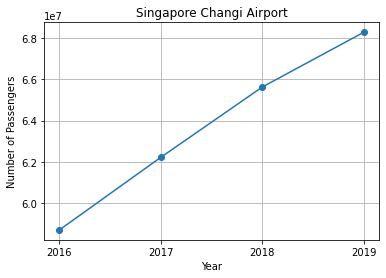

In [34]:
# find the trend of the number of passengers for an airport throughout the years
airport_name_fragment = 'Changi' # at least write 2 words for a more accurate result

airport_passengers = airports_final[airports_final['Airport Name'].str.contains(airport_name_fragment)]
airport_passengers = airport_passengers[['Year', 'Airport Name', 'Country', 'Passengers']]
airport_name = airport_passengers['Airport Name'].unique()

plt.plot(airport_passengers['Year'], airport_passengers['Passengers'], marker='o')
plt.xticks(airport_passengers['Year'])
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.title(airport_name[0])
plt.grid()
plt.show()

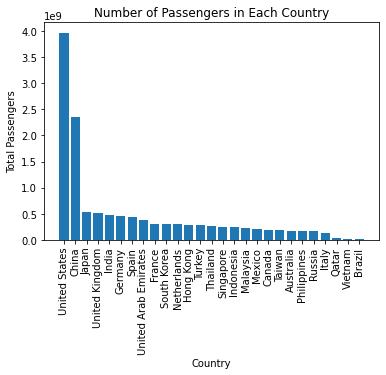

In [35]:
# country vs number of passengers plot
country_passengers = airports_new.groupby('Country').agg({'Passengers':'sum'})
country_passengers = country_passengers.reset_index()
country_passengers = country_passengers.sort_values('Passengers', ascending=False)

plt.bar(country_passengers['Country'], country_passengers['Passengers'])
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.ylabel('Total Passengers')
plt.title('Number of Passengers in Each Country')
plt.show()

Looks like USA and China are the two countries that have the most passengers from 2016 to 2020. This might happen because there are some countries that doesn't have any data for 2020. For now, I'm going to remove USA and China so that the rest of the countries can have a clearer representation.

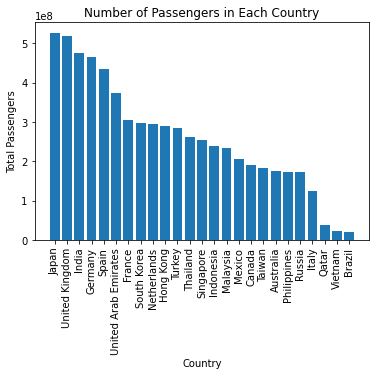

In [36]:
country_passenger_no_usa_china = country_passengers[(country_passengers['Country'] != 'United States') & (country_passengers['Country'] != 'China')]

plt.bar(country_passenger_no_usa_china['Country'], country_passenger_no_usa_china['Passengers'])
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.ylabel('Total Passengers')
plt.title('Number of Passengers in Each Country')
plt.show()

Now I'm going to filter our 2020 so that the sum of passengers in each country will be fair.

In [37]:
# count the number of countries present in the year 2016-2020
country_len = []
year = 2016
while year < 2021:
    country = total_passengers_country[total_passengers_country['Year'] == year]
    x = len(country['Country'].unique())
    country_len.append(x)
    year += 1
country_len

[24, 24, 24, 23, 17]

As seen above, the year 2020 only has 17 unique countries so I'm going to filter 2020 out. In 2019 however, one country is not there but the effect of its absence might not be significant so I'm going to leave it alone. 

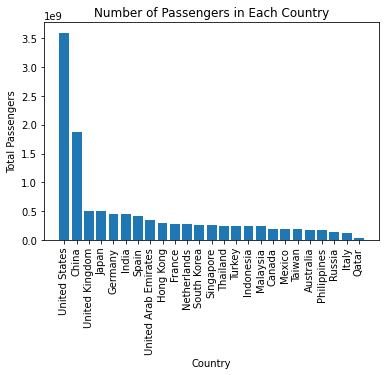

In [38]:
# Filter out the year 2020
country_passengers_no_2020 = airports_new[airports_new['Year'] != 2020].groupby('Country').agg({'Passengers':'sum'})
country_passengers_no_2020 = country_passengers_no_2020.reset_index().sort_values('Passengers', ascending=False)

plt.bar(country_passengers_no_2020['Country'], country_passengers_no_2020['Passengers'])
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.ylabel('Total Passengers')
plt.title('Number of Passengers in Each Country')
plt.show()

Looks like filtering out the year 2020 doesn't make any difference.<br>
The cause of the high values might be because of USA and China's counts are higher than the other countries.

In [39]:
# Checking the count of each country
country_counts = airports_final['Country'].value_counts()
country_counts

United States           76
China                   49
Japan                    9
India                    9
Spain                    9
United Kingdom           9
Germany                  9
Turkey                   6
South Korea              6
Netherlands              5
Thailand                 5
Russia                   5
Mexico                   5
France                   5
United Arab Emirates     5
Hong Kong                4
Singapore                4
Malaysia                 4
Indonesia                4
Canada                   4
Taiwan                   4
Philippines              4
Australia                4
Italy                    3
Brazil                   1
Vietnam                  1
Qatar                    1
Name: Country, dtype: int64

Looks like the cause of the large gap in numbers is due to the counts of USA and China.

Next, I'm going to dive deeper to find out how many airports from each country are listed in this dataset.

In [40]:
country_list = airports_final['Country'].unique()

for country in country_list:
    airport_count = airports_final[airports_final['Country'] == country]
    airport_count = airport_count['Airport Name'].unique()
    print('No. of airports in ' + country + ' : ' + str(len(airport_count)))

No. of airports in China : 17
No. of airports in United States : 17
No. of airports in Japan : 2
No. of airports in India : 2
No. of airports in United Arab Emirates : 1
No. of airports in Turkey : 3
No. of airports in France : 1
No. of airports in United Kingdom : 3
No. of airports in Mexico : 1
No. of airports in Vietnam : 1
No. of airports in South Korea : 3
No. of airports in Netherlands : 1
No. of airports in Brazil : 1
No. of airports in Russia : 2
No. of airports in Germany : 2
No. of airports in Spain : 2
No. of airports in Thailand : 1
No. of airports in Hong Kong : 1
No. of airports in Singapore : 1
No. of airports in Malaysia : 1
No. of airports in Indonesia : 2
No. of airports in Canada : 1
No. of airports in Taiwan : 1
No. of airports in Philippines : 1
No. of airports in Australia : 1
No. of airports in Italy : 1
No. of airports in Qatar : 1


Before going further, I'm curious about the consistency of the airport names since when I was looking at the different airport names, I remember that Indonesia only has 1 airport listed in this dataset.

In [41]:
# check if the airport names are all consistent
for country in country_list:
    x = airports_final[airports_final['Country'] == country]
    result = x['Airport Name'].unique()
    print(country + ': ' + result)

['China: Guangzhou Baiyun International Airport'
 'China: Chengdu Shuangliu International Airport'
 "China: Shenzhen Bao'an International Airport"
 'China: Chongqing Jiangbei International Airport'
 'China: Beijing Capital International Airport'
 'China: Kunming Changshui International Airport'
 'China: Shanghai Hongqiao International Airport'
 "China: Xi'an Xianyang International Airport"
 'China: Shanghai Pudong International Airport'
 'China: Hangzhou Xiaoshan International Airport'
 'China: Zhengzhou Xinzheng International Airport'
 'China: Nanjing Lukou International Airport'
 'China: Changsha Huanghua International Airport'
 'China: Xiamen Gaoqi International Airport'
 'China: Guiyang Longdongbao International Airport'
 'China: Haikou Meilan International Airport'
 'China: Beijing Daxing International Airport']
['United States: Hartsfield–Jackson Atlanta International Airport'
 'United States: Dallas/Fort Worth International Airport'
 'United States: Denver International Airport'

From the results above, it looks like UK's Gatwick Airport and London Gatwick Airport are written in two different ways. The same goes to Soekarno-Hatta International Airport.

I'm going to fix it first before going further.

In [42]:
airports_final['Airport Name'] = airports_final['Airport Name'].str.replace('Soekarno–Hatta International Airport', 'Soekarno-Hatta International Airport')
airports_final['Airport Name'] = airports_final['Airport Name'].str.replace('London Gatwick Airport', 'Gatwick Airport')

In [43]:
country_list = airports_final['Country'].unique()

for country in country_list:
    airport_count = airports_final[airports_final['Country'] == country]
    airport_count = airport_count['Airport Name'].unique()
    print('No. of airports in ' + country + ' : ' + str(len(airport_count)))

No. of airports in China : 17
No. of airports in United States : 17
No. of airports in Japan : 2
No. of airports in India : 2
No. of airports in United Arab Emirates : 1
No. of airports in Turkey : 3
No. of airports in France : 1
No. of airports in United Kingdom : 2
No. of airports in Mexico : 1
No. of airports in Vietnam : 1
No. of airports in South Korea : 3
No. of airports in Netherlands : 1
No. of airports in Brazil : 1
No. of airports in Russia : 2
No. of airports in Germany : 2
No. of airports in Spain : 2
No. of airports in Thailand : 1
No. of airports in Hong Kong : 1
No. of airports in Singapore : 1
No. of airports in Malaysia : 1
No. of airports in Indonesia : 1
No. of airports in Canada : 1
No. of airports in Taiwan : 1
No. of airports in Philippines : 1
No. of airports in Australia : 1
No. of airports in Italy : 1
No. of airports in Qatar : 1


The update seem to have worked successfully. The results above also show why USA and China has the most number of passengers from the previous bar chart. It can be seen that both countries have 17 airports.

Next, I'm going to dive even deeper to see the counts of each of USA and China's airports.

In [44]:
# american airports
american_airports = airports_final[airports_final['Country'] == 'United States']
american_airports = american_airports['Airport Name'].value_counts()

# chinese airports
chinese_airports = airports_final[airports_final['Country'] == 'China']
chinese_airports = chinese_airports['Airport Name'].value_counts()

display('American Airports:', american_airports, 
        'Chinese Airports:', chinese_airports)

'American Airports:'

Hartsfield–Jackson Atlanta International Airport    5
Dallas/Fort Worth International Airport             5
Newark Liberty International Airport                5
San Francisco International Airport                 5
John F. Kennedy International Airport               5
George Bush Intercontinental Airport                5
Miami International Airport                         5
Seattle–Tacoma International Airport                5
Orlando International Airport                       5
Phoenix Sky Harbor International Airport            5
Charlotte Douglas International Airport             5
Los Angeles International Airport                   5
O'Hare International Airport                        5
Denver International Airport                        5
McCarran International Airport                      4
Fort Lauderdale–Hollywood International Airport     1
Minneapolis/St Paul International Airport           1
Name: Airport Name, dtype: int64

'Chinese Airports:'

Guangzhou Baiyun International Airport       5
Kunming Changshui International Airport      5
Chengdu Shuangliu International Airport      5
Shanghai Hongqiao International Airport      5
Shanghai Pudong International Airport        5
Beijing Capital International Airport        5
Shenzhen Bao'an International Airport        5
Xi'an Xianyang International Airport         4
Chongqing Jiangbei International Airport     2
Hangzhou Xiaoshan International Airport      1
Zhengzhou Xinzheng International Airport     1
Nanjing Lukou International Airport          1
Changsha Huanghua International Airport      1
Xiamen Gaoqi International Airport           1
Guiyang Longdongbao International Airport    1
Haikou Meilan International Airport          1
Beijing Daxing International Airport         1
Name: Airport Name, dtype: int64

It looks like American airports' counts are relatively uniform with nearly 5 counts for all. Chinese airports on the other hand, most of the counts are 5s and 1s.

Next, I'm going to find out which airport among the American and Chinese airports that has 5 counts contributed to the most number of passengers.

In [45]:
# American airports
american_airports = american_airports.reset_index()
american_airports = american_airports.rename(columns={'index':'Airport Name', 'Airport Name':'Count'})
american_airports_five = american_airports[american_airports['Count'] == 5]

# Chinese Airports
chinese_airports = chinese_airports.reset_index()
chinese_airports = chinese_airports.rename(columns={'index':'Airport Name', 'Airport Name':'Count'})
chinese_airports_five = chinese_airports[chinese_airports['Count'] == 5]

In [46]:
display(american_airports_five, 
        chinese_airports_five)

,Airport Name,Count
0,Hartsfield–Jackson Atlanta International Airport,5
1,Dallas/Fort Worth International Airport,5
2,Newark Liberty International Airport,5
3,San Francisco International Airport,5
4,John F. Kennedy International Airport,5
5,George Bush Intercontinental Airport,5
6,Miami International Airport,5
7,Seattle–Tacoma International Airport,5
8,Orlando International Airport,5
9,Phoenix Sky Harbor International Airport,5


,Airport Name,Count
0,Guangzhou Baiyun International Airport,5
1,Kunming Changshui International Airport,5
2,Chengdu Shuangliu International Airport,5
3,Shanghai Hongqiao International Airport,5
4,Shanghai Pudong International Airport,5
5,Beijing Capital International Airport,5
6,Shenzhen Bao'an International Airport,5


In [47]:
# find the total number of passengers by airport name of these countries

# american airports
american_airports_group = airports_final[airports_final['Airport Name'].isin(american_airports_five['Airport Name'])]
american_airports_group = american_airports_group.groupby('Airport Name').agg({'Passengers':'sum'})
american_airports_group_passenger = american_airports_group.sort_values('Passengers', ascending=False)

# chinese airports
chinese_airports_group = airports_final[airports_final['Airport Name'].isin(chinese_airports_five['Airport Name'])]
chinese_airports_group = chinese_airports_group.groupby('Airport Name').agg({'Passengers':'sum'})
chinese_airports_group_passenger = chinese_airports_group.sort_values('Passengers', ascending=False)

display(american_airports_group_passenger, 
        chinese_airports_group_passenger)

,Passengers
Airport Name,
Hartsfield–Jackson Atlanta International Airport,468918941
Los Angeles International Airport,369861419
O'Hare International Airport,356727717
Dallas/Fort Worth International Airport,316307444
Denver International Airport,286897356
John F. Kennedy International Airport,259011073
San Francisco International Airport,240457806
Seattle–Tacoma International Airport,214411160
Charlotte Douglas International Airport,214147425


,Passengers
Airport Name,
Beijing Capital International Airport,425688451
Shanghai Pudong International Airport,316639968
Guangzhou Baiyun International Airport,312528019
Chengdu Shuangliu International Airport,245391420
Shenzhen Bao'an International Airport,227730433
Kunming Changshui International Airport,214991602
Shanghai Hongqiao International Airport,202775721


The results above shows that in USA, Hartsfield-Jackson Atlanta International Airport contributed to the most number of passengers from 2016-2020 while in China, Beijing Capital International Airport contributed to the most number of passengers from 2016-2020.

Next, I want to find out for airports that were listed in the dataset from 2016-2020 (count = 5), what is the percentage of total passengers in that airport compared to airports listed from 2016-2020 ((total passengers in an airport / total passengers worldwide) x 100).

In [48]:
# count and filter for airports that appears in the dataset from 2016-2020 (count = 5)
global_airports = airports_final['Airport Name'].value_counts().reset_index()
global_airports = global_airports.rename(columns={'index':'Airport Name', 'Airport Name':'Count'})
global_airports = global_airports[global_airports['Count'] == 5]
global_airports

,Airport Name,Count
0,Guangzhou Baiyun International Airport,5
1,Hartsfield–Jackson Atlanta International Airport,5
2,Heathrow Airport,5
3,Mexico City International Airport,5
4,Phoenix Sky Harbor International Airport,5
5,Orlando International Airport,5
6,Amsterdam Airport Schiphol,5
7,Seattle–Tacoma International Airport,5
8,Miami International Airport,5
9,Dubai International Airport,5


In [49]:
# use the previous dataframe as a "subquery" to the airports_final dataframe
pass_ratio_five = airports_final[airports_final['Airport Name'].isin(global_airports['Airport Name'])]
pass_ratio_five = pass_ratio_five.groupby(['Airport Name', 'Country']).agg({'Passengers':'sum'})
pass_ratio_five = pass_ratio_five.reset_index().sort_values('Passengers', ascending=False)
pass_ratio_five

,Airport Name,Country,Passengers
11,Hartsfield–Jackson Atlanta International Airport,United States,468918941
1,Beijing Capital International Airport,China,425688451
7,Dubai International Airport,United Arab Emirates,373342493
16,Los Angeles International Airport,United States,369861419
30,Tokyo Haneda Airport,Japan,360148814
21,O'Hare International Airport,United States,356727717
12,Heathrow Airport,United Kingdom,336854423
27,Shanghai Pudong International Airport,China,316639968
5,Dallas/Fort Worth International Airport,United States,316307444
10,Guangzhou Baiyun International Airport,China,312528019


In [50]:
# sum of all the passengers
global_pass_sum = pass_ratio_five['Passengers'].sum()
global_pass_sum

8609962590

In [51]:
# make a new column to get the percentage
pass_ratio_five['Passenger Percentage'] = (pass_ratio_five['Passengers'] / global_pass_sum) * 100
pass_ratio_five[['Airport Name', 'Passengers', 'Passenger Percentage']]

,Airport Name,Passengers,Passenger Percentage
11,Hartsfield–Jackson Atlanta International Airport,468918941,5.446237
1,Beijing Capital International Airport,425688451,4.944138
7,Dubai International Airport,373342493,4.336169
16,Los Angeles International Airport,369861419,4.295738
30,Tokyo Haneda Airport,360148814,4.182931
21,O'Hare International Airport,356727717,4.143197
12,Heathrow Airport,336854423,3.912380
27,Shanghai Pudong International Airport,316639968,3.677600
5,Dallas/Fort Worth International Airport,316307444,3.673738
10,Guangzhou Baiyun International Airport,312528019,3.629842


From 2016-2020, Hartsfield-Jackson Atlanta International Airport contributed approximately 5.4% of the world's total passengers followed by Beijing Capital International Airport at 4.9%.

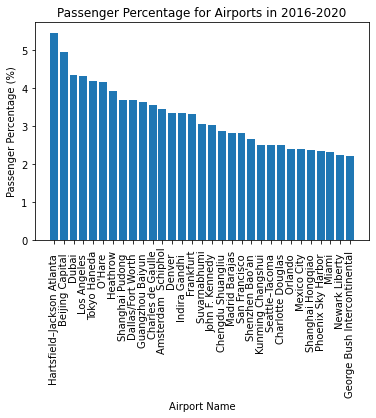

In [52]:
# remove the 'international' & 'airport' words from the airport name for the graphing since it's too long
to_replace = '|'.join(['International', 'Airport'])
pass_ratio_five_new_airport = pass_ratio_five['Airport Name'].str.replace(to_replace, '', regex=True)

# bar plot
plt.bar(pass_ratio_five_new_airport, pass_ratio_five['Passenger Percentage'])
plt.xticks(rotation=90)
plt.xlabel('Airport Name')
plt.ylabel('Passenger Percentage (%)')
plt.title('Passenger Percentage for Airports in 2016-2020')
plt.show()

This time I'm going to group them by country and do the exact same thing.

In [53]:
pass_ratio_country = pass_ratio_five.groupby('Country').agg({'Passengers':'sum', 'Passenger Percentage':'sum'})
pass_ratio_country = pass_ratio_country.reset_index().sort_values('Passenger Percentage', ascending=False)
pass_ratio_country

,Country,Passengers,Passenger Percentage
11,United States,3713081519,43.125408
0,China,1945745614,22.598770
9,United Arab Emirates,373342493,4.336169
4,Japan,360148814,4.182931
10,United Kingdom,336854423,3.912380
1,France,306041788,3.554508
6,Netherlands,295788279,3.435419
3,India,285975557,3.321449
2,Germany,284124662,3.299952
8,Thailand,262259752,3.046003


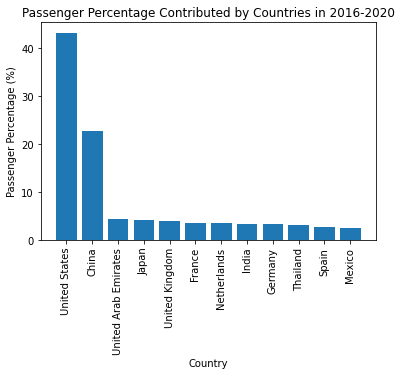

In [54]:
plt.bar(pass_ratio_country['Country'], pass_ratio_country['Passenger Percentage'])
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Passenger Percentage (%)')
plt.title('Passenger Percentage Contributed by Countries in 2016-2020')
plt.show()

Even by grouping by country, USA contributed roughly half of the total passengers worldwide. This might happen because people around the world tend to travel to USA for business or holiday purposes. It might also happen because USA has a lot of airports compared to other countries. This however, cannot be proven yet since there are no data regarding the number of airports in USA and in other countries. There are also no data regarding whether a passenger travel to USA for holiday or business purposes.

Next, I'm going to filter for the year 2020 only to compare if USA and China has the most flights compared to other countries. As we know, the Covid-19 pandemic happened in 2020 and many countries doesn't allow any air travel or restricts air travel strictly to prevent the virus from spreading.

In [55]:
# 2020 passenger numbers & Percentage
pass_2020 = airports_final[airports_final['Year'] == 2020]
pass_country_2020 = pass_2020.groupby('Country').agg({'Passengers':'sum'})
pass_country_2020 = pass_country_2020.reset_index().sort_values('Passengers', ascending=False)

pass_country_2020['Passenger Percentage'] = (pass_country_2020['Passengers'] / pass_country_2020['Passengers'].sum()) * 100

pass_country_2020

,Country,Passengers,Passenger Percentage
1,China,472211986,38.599299
15,United States,368767320,30.143581
12,Turkey,40391456,3.301657
9,South Korea,38500935,3.147123
8,Russia,36084000,2.949559
5,Japan,30965027,2.531127
4,India,28501000,2.329713
13,United Arab Emirates,25900000,2.117104
2,France,22257469,1.819358
14,United Kingdom,22109726,1.807281


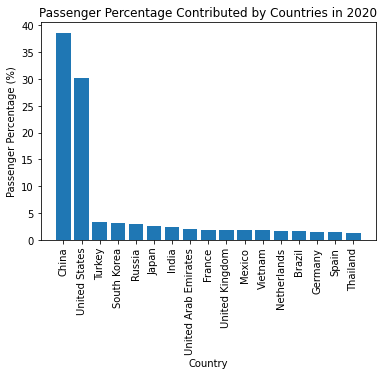

In [56]:
plt.bar(pass_country_2020['Country'], pass_country_2020['Passenger Percentage'])
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Passenger Percentage (%)')
plt.title('Passenger Percentage Contributed by Countries in 2020')
plt.show()

Based on the results, USA and China still contributed around 39% and 30% of passengers respectively despite the presence of the Covid-19 virus. It might be because they don't have any strict restrictions regarding air travel.

Next, I'm going to see if the number of passengers of each country are relatively consistent each year for countries listed in the dataset from 2016-2020 by taking the mean and standard deviation.

In [57]:
# get the list of airports that appeared in 2016-2020
global_airports_five = airports_final['Airport Name'].value_counts()
global_airports_five = global_airports_five.reset_index().rename(columns={'index':'Airport Name', 'Airport Name':'Count'})
global_airports_five = global_airports_five[global_airports_five['Count'] == 5]

# filter for the airports that appears in the list and get their passengers statistics
pass_stats = airports_final[airports_final['Airport Name'].isin(global_airports_five['Airport Name'])]
pass_stats = pass_stats.groupby('Country')['Passengers'].describe().reset_index()
pass_stats

,Country,count,mean,std,min,25%,50%,75%,max
0,China,35.0,5.559273e+07,1.976444e+07,30476531.0,41977802.5,48076238.0,67885955.50,100983290.0
1,France,5.0,6.120836e+07,2.209354e+07,22257469.0,65933145.0,69471442.0,72229723.00,76150009.0
2,Germany,5.0,5.682493e+07,2.163431e+07,18770998.0,60786937.0,64500386.0,69510269.00,70556072.0
3,India,5.0,5.719511e+07,1.698506e+07,28501000.0,55631385.0,63451503.0,68490731.00,69900938.0
4,Japan,5.0,7.202976e+07,2.337685e+07,30965027.0,76476251.0,79699762.0,85505054.00,87502720.0
5,Mexico,5.0,4.122665e+07,1.125920e+07,21981711.0,41410254.0,44732418.0,47700834.00,50308049.0
6,Netherlands,5.0,5.915766e+07,2.162839e+07,20887174.0,63625534.0,68515425.0,71053147.00,71706999.0
7,Spain,5.0,4.809328e+07,1.784627e+07,17112000.0,50397928.0,53386075.0,57862951.00,61707469.0
8,Thailand,5.0,5.245195e+07,2.029736e+07,16706000.0,55892428.0,60860557.0,63378923.00,65421844.0
9,United Arab Emirates,5.0,7.466850e+07,2.734319e+07,25900000.0,83654250.0,86396757.0,88242099.00,89149387.0


In [58]:
# make a boxplot for all countries to check for outliers

# -------

The mean and median of passengers per country seem to be different by a lot which means that there are extreme values present. Because of this, I'm going to use the 1st, 2nd and 3rd quartiles to see if the number passengers are relatively stable throughout the years because these estimators are more robust to outliers.

In [59]:
pass_percentiles = pass_stats[['Country', '25%', '50%', '75%']].copy()
pass_percentiles['IQR'] = pass_percentiles['75%'] - pass_percentiles['25%']
pass_percentiles = pass_percentiles.rename(columns={'25%':'25th', '50%':'50th', '75%':'75th'})
pass_percentiles = pass_percentiles.sort_values('IQR', ascending=True)
pass_percentiles

,Country,25th,50th,75th,IQR
10,United Kingdom,75715474.0,78014598.0,80126320.00,4410846.00
9,United Arab Emirates,83654250.0,86396757.0,88242099.00,4587849.00
5,Mexico,41410254.0,44732418.0,47700834.00,6290580.00
1,France,65933145.0,69471442.0,72229723.00,6296578.00
6,Netherlands,63625534.0,68515425.0,71053147.00,7427613.00
7,Spain,50397928.0,53386075.0,57862951.00,7465023.00
8,Thailand,55892428.0,60860557.0,63378923.00,7486495.00
2,Germany,60786937.0,64500386.0,69510269.00,8723332.00
4,Japan,76476251.0,79699762.0,85505054.00,9028803.00
3,India,55631385.0,63451503.0,68490731.00,12859346.00


In [60]:
# melt the dataframe in order to be able to make subplots using seaborn
pass_percentiles_melt = pd.melt(pass_percentiles, id_vars=['Country'], value_vars=['25th', '50th', '75th', 'IQR'],
           var_name='Percentile', value_name='Percentile Value')
pass_percentiles_melt

,Country,Percentile,Percentile Value
0,United Kingdom,25th,75715474.00
1,United Arab Emirates,25th,83654250.00
2,Mexico,25th,41410254.00
3,France,25th,65933145.00
4,Netherlands,25th,63625534.00
5,Spain,25th,50397928.00
6,Thailand,25th,55892428.00
7,Germany,25th,60786937.00
8,Japan,25th,76476251.00
9,India,25th,55631385.00


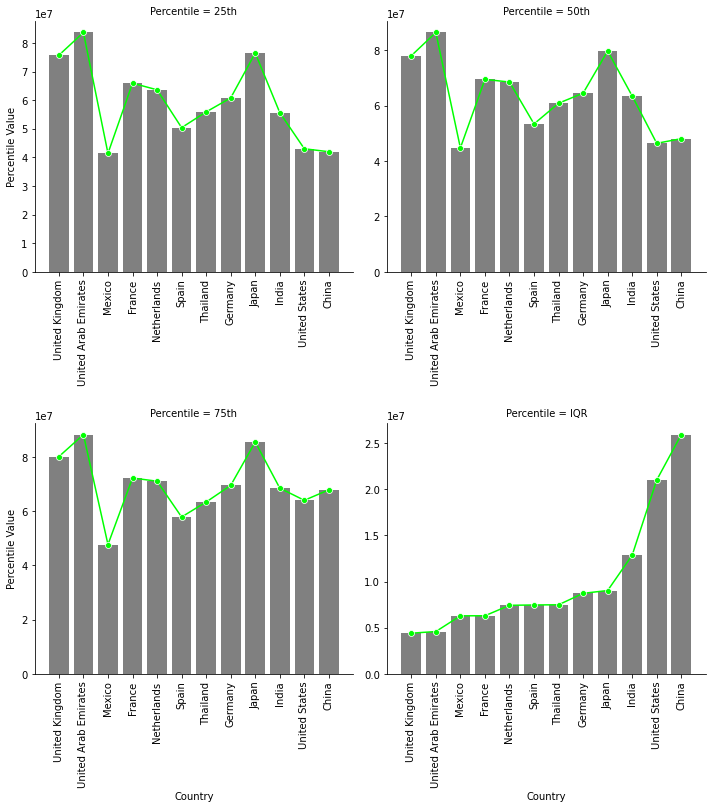

In [61]:
# make subplots for all the countries for all columns
g = sns.catplot(x='Country',
            y='Percentile Value',
            kind='bar',
            color='grey',
            col='Percentile',
            col_wrap=2,
            sharey=False,
            sharex=False,
            data=pass_percentiles_melt)
g.map_dataframe(sns.lineplot, x='Country', y='Percentile Value', marker='o', color='lime')
g.set_xticklabels(rotation=90)

# add space between the top row and bottom row to fit the x-axis labels
plt.subplots_adjust(hspace=.6)
plt.show()

#### Percentile Observation
From bar graph results, it can be observed that the trend for the 25th, 50th and 75th percentiles are the same. Assuming that outliers are not present, the mean and median values will be very close to one another. In this case, assuming that outliers are not present, it's possible to approximate mean with the median. Because of this, I'm going to approximate the mean of the result with its median. As seen on the 50th percentile bar chart, it can be seen that UAE has the highest median value. In other words, UAE has the highest average passengers throughout the year. Ironically, both USA and China have one of the lowest average number of passengers throughout the years without the presence of outliers.

#### IQR Observation
For the IQR, it can be observed that both UK and the UAE had the lowest values. On the other hand, China, USA and India's IQR were relatively high amongst the rest with China having the highest IQR followed by USA and India respectively. 

Since UK and UAE had the lowest IQR, it means that the number of passengers in their country are relatively stable throughout the year. This means that the number of passengers in those countries does not fluctuate as much as other countries. On the other hand, China's number of passengers are fluctuating the most compared to other countries followed by USA, India and so on.